# Práctica 7: Regresión múltiple con statsmodels

Esta práctica es continuación de la [**anterior**]() con el objetivo de ajustar un modelo lineal multivariante haciendo uso de más información que pueda influir en el pronostico de la variable de interés. En esta ocasión se hace uso de la librería [**StatsModels**](https://www.statsmodels.org/stable/index.html) para realizar los ajustes de regresión.

En base a las practicas pasadas se sabe que el comportamiento del rendimiento depende mucho de la función de activación utilizada para pasar la información entre las capas ocultas de la red neuronal, por ello se ajustara un modelo para cada una de las funciones de activación.


In [64]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import statsmodels.api as sm
import seaborn as sns
pd.set_option('max_rows', 10)

d = pd.read_csv("../lbfgs_crudo.csv", index_col=0)
d_tanh=d.loc[d.activation=='tanh']
d_tanh = pd.DataFrame(d_tanh, columns = ['test_accuracy','partition','layer_num','neurona_num','alpha'])
d_log=d.loc[d.activation=='logistic']
d_log = pd.DataFrame(d_log, columns = ['test_accuracy','partition','layer_num','neurona_num','alpha'])


Primero se hace el ajuste a los datos que utilizan la función de activación **tangente hiperbólica**. Al igual que en la practica anterior la variable a pronosticar es el rendimiento sobre el conjunto de prueba (test_accuracy) pero en esta ocasión se toman como variables independientes el resto de los factores, es decir, **partición**, **número de capas**, **número de neuronas por capa** y **alpha**.

In [41]:
y = d_tanh['test_accuracy']
x = d_tanh[['partition','layer_num','neurona_num','alpha']]
x = sm.add_constant(x)
m = sm.OLS(y, x).fit() 
print(m.summary())

                            OLS Regression Results                            
Dep. Variable:          test_accuracy   R-squared:                       0.739
Model:                            OLS   Adj. R-squared:                  0.739
Method:                 Least Squares   F-statistic:                     3052.
Date:                Mon, 25 Mar 2019   Prob (F-statistic):               0.00
Time:                        01:37:26   Log-Likelihood:                 1177.1
No. Observations:                4314   AIC:                            -2344.
Df Residuals:                    4309   BIC:                            -2312.
Df Model:                           4                                         
Covariance Type:            nonrobust                                         
                  coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------
const           1.0498      0.009    112.164      

Cada uno de los coeficientes que multiplican a las variables independientes pasan las pruebas de significancia, sin embargo, el valor de R^2 del modelo es bajo para confiar en el modelo. Revisando la [practica 4](https://nbviewer.jupyter.org/github/alan-arnoldo-alcantar/DataScience_UANL/blob/master/p4/practica4.ipynb) se observa que en el niveles 1000 de **Alpha** hay un cambio drástico pero solo al utilizar 4, 7 y 10 capas, mientras que utilizando 1 capa esto parece no afectar, además que los mejores rendimientos se dan con 1 capa. En base a lo anterior parece bueno tomar en cuenta solo los rendimientos de solo 1 capa y volver hacer la regresión.

In [65]:
d_tanh_1=d_tanh.loc[(d_tanh.layer_num==1)]
d_tanh_1 = pd.DataFrame(d_tanh_1, columns = ['test_accuracy','partition','neurona_num','alpha'])
y = d_tanh_1['test_accuracy']
x = d_tanh_1[['partition','neurona_num','alpha']]
x = sm.add_constant(x)
m = sm.OLS(y, x).fit() 
print(m.summary())

                            OLS Regression Results                            
Dep. Variable:          test_accuracy   R-squared:                       0.810
Model:                            OLS   Adj. R-squared:                  0.809
Method:                 Least Squares   F-statistic:                     1528.
Date:                Mon, 25 Mar 2019   Prob (F-statistic):               0.00
Time:                        02:31:15   Log-Likelihood:                 3545.3
No. Observations:                1080   AIC:                            -7083.
Df Residuals:                    1076   BIC:                            -7063.
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
                  coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------
const           0.8902      0.001   1106.246      

De nuevo los coeficientes del modelo son significativos, aunque el valor de R^2 aumenta sigue siendo bajo para confiar en el modelo. Por último, es necesario revisar si hay correlación entre las independientes que pueda causar ruido sobre el modelo.

               test_accuracy  partition   neurona_num         alpha
test_accuracy       1.000000   0.501188  7.090271e-01 -2.366711e-01
partition           0.501188   1.000000  0.000000e+00  0.000000e+00
neurona_num         0.709027   0.000000  1.000000e+00 -3.408852e-19
alpha              -0.236671   0.000000 -3.408852e-19  1.000000e+00


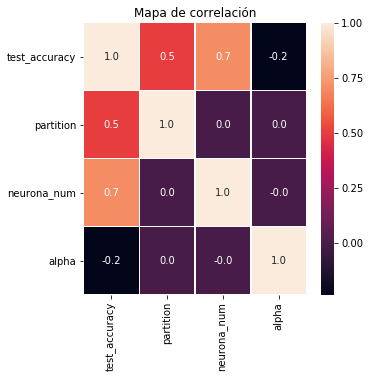

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x00000243FC7AAD30>,
      dtype=object)

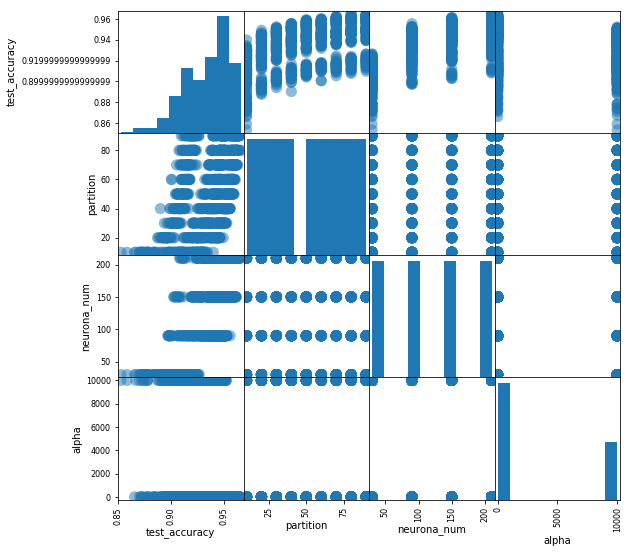

In [50]:
print(d_tanh_1.corr())

####MAPA DE CALOR
f,ax=plt.subplots(figsize = (5,5)) ###figsize=(alto de cuadro,ancho de cuadro)
sns.heatmap(d_tanh_1.corr(),annot= True,linewidths=0.5,fmt = ".1f",ax=ax)
plt.xticks(rotation=90)
plt.yticks(rotation=0)
plt.title('Mapa de correlación')
plt.show()

pd.plotting.scatter_matrix(d_tanh_1, figsize = (9, 9), s = 500)

Sin más ideas para estos datos, se pasa a los datos cuya función de activación es **logística**.

In [51]:
y = d_log['test_accuracy']
x = d_log[['partition','layer_num','neurona_num','alpha']]
x = sm.add_constant(x) # para contar con la b en nuestra f()
m = sm.OLS(y, x).fit() 
print(m.summary())

                            OLS Regression Results                            
Dep. Variable:          test_accuracy   R-squared:                       0.601
Model:                            OLS   Adj. R-squared:                  0.601
Method:                 Least Squares   F-statistic:                     1626.
Date:                Mon, 25 Mar 2019   Prob (F-statistic):               0.00
Time:                        02:00:46   Log-Likelihood:                 293.03
No. Observations:                4316   AIC:                            -576.1
Df Residuals:                    4311   BIC:                            -544.2
Df Model:                           4                                         
Covariance Type:            nonrobust                                         
                  coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------
const           0.7529      0.011     65.541      

A diferencia de los datos anteriores en este caso parece que los únicos coeficientes que importan son la constante y el que acompaña al número de capas. De nuevo tomando como referencia la [practica 4](https://nbviewer.jupyter.org/github/alan-arnoldo-alcantar/DataScience_UANL/blob/master/p4/practica4.ipynb) parece que el factor número de capas afecta de manera exponencial negativa al rendimiento, por lo tanto, es buena idea hacer una **transformación logarítmica a los niveles del número de capas** y que el factor alpha parece no tener efecto sobre él rendimiento.

In [71]:
from math import log
d_log['transf']=np.log(d_log['layer_num'])
d_log_transf=pd.DataFrame(d_log, columns = ['test_accuracy','partition','transf','neurona_num'])
print(d_log_transf.corr())

y = d_log_transf['test_accuracy']
x = d_log_transf[['partition','transf','neurona_num']]
x = sm.add_constant(x)
m = sm.OLS(y, x).fit() 
print(m.summary())

               test_accuracy  partition    transf  neurona_num
test_accuracy       1.000000   0.007640 -0.927887     0.011372
partition           0.007640   1.000000  0.000990     0.001447
transf             -0.927887   0.000990  1.000000    -0.001143
neurona_num         0.011372   0.001447 -0.001143     1.000000
                            OLS Regression Results                            
Dep. Variable:          test_accuracy   R-squared:                       0.861
Model:                            OLS   Adj. R-squared:                  0.861
Method:                 Least Squares   F-statistic:                     8915.
Date:                Mon, 25 Mar 2019   Prob (F-statistic):               0.00
Time:                        03:10:10   Log-Likelihood:                 2569.3
No. Observations:                4316   AIC:                            -5131.
Df Residuals:                    4312   BIC:                            -5105.
Df Model:                           3                

La transformación ayuda a mejorar el ajuste del modelo, incluso el valor R^2 comienza a ser relevante, aun así, persiste el problema de insignificancia para la partición, número de neuronas y alpha, lo cual va contra todo lo visto en las practicas pasadas. De nuevo se hace un mapa de correlaciones para evitar estar utilizar variables independientes de más.

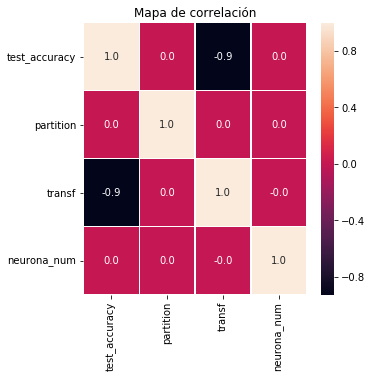

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x00000243FEBD7518>,
      dtype=object)

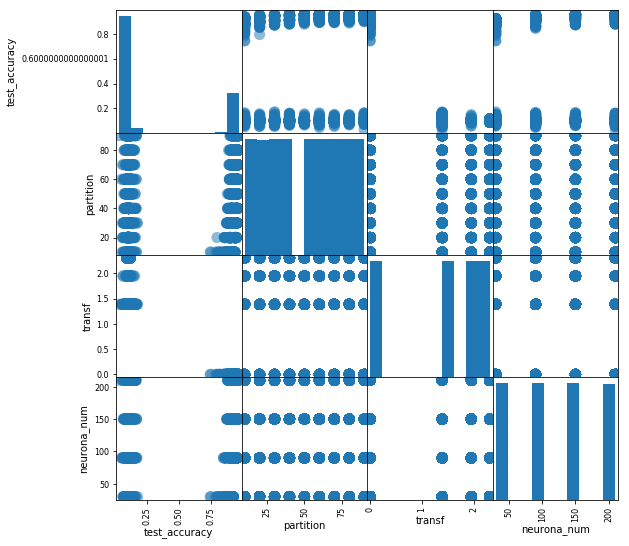

In [69]:
f,ax=plt.subplots(figsize = (5,5))
sns.heatmap(d_log_transf.corr(),annot= True,linewidths=0.5,fmt = ".1f",ax=ax)
plt.xticks(rotation=90)
plt.yticks(rotation=0)
plt.title('Mapa de correlación')
plt.show()

pd.plotting.scatter_matrix(d_log_transf, figsize = (9, 9), s = 500)

Para finalizar se hace uso de esta última regresión para los datos con función de activación logística y niveles transformados, que fue la que mejor se ajusto para hacer un conteo de los valores predichos que se encuentran alejados cierto porcentaje del valor real.

In [77]:
comp = pd.DataFrame(d_log_transf, columns = ['test_accuracy'])
comp['pron'] = m.predict(x) 
comp['error'] = comp.test_accuracy - comp.pron
comp['absE'] = pd.DataFrame.abs(comp['error'])

n = len(comp)
for e in [0.1, 0.2, 0.3]:
    k = sum(comp.absE < e)
    print(k, "de", n , "= {:.2f}% tuvieron un error del {}%".format(100 * k / n, e*100))

1724 de 4316 = 39.94% tuvieron un error del 10.0%
3413 de 4316 = 79.08% tuvieron un error del 20.0%
4316 de 4316 = 100.00% tuvieron un error del 30.0%
